<div align=center>

<p></p>
<p></p>
 <br/>
    <br/>
<font size=5 color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font size=5 color=blue>
Machine Learning - Dr. Fatemeh Seyyedsalehi
</font>
<br/>
<br/>
Spring 2024

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Assignment 4 - Bank Marketing Classification
			</font>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  May the 31st


<br/>
<br/>
<b>
<font size=5>
Kian Izadpanah - 400104783
</font>
<b/>
                <br/><br/><br/>
                <font color=red>
     </font>
</font>
                <br/>
    </div>



# Bank Marketing Classification

In this part of the assignment we want to do a classification task using PyTorch on bank marketing dataset.

## Import Library

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

## Load Dataset
Here, you should download and load the dataset. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [3]:
#TODO
df = pd.read_csv("/kaggle/input/bankfullcsv/bank-full.csv")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
non_numerical_cols = df.select_dtypes(include=['object']).columns

## Normalize data
normalize numerical data.

In [4]:
# Normalize numerical data
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Create Data Loader
create data loader for pytorch

In [5]:
#TODO
label_encoders = {}
for col in non_numerical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


X = df.drop(columns=["Target"])
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = df["Target"]

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long) 

X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## Model
define your model in here

In [6]:
class BankMarketingNet(nn.Module):
    def __init__(self):
        super(BankMarketingNet, self).__init__()
        self.fully_connected1 = nn.Linear(input_size, 64)
        self.fully_connected2 = nn.Linear(64, 32)
        self.fully_connected3 = nn.Linear(32, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = self.relu(self.fully_connected1(x))
        x = self.dropout(x)
        x = self.relu(self.fully_connected2(x))
        x = self.dropout(x)
        x = self.fully_connected3(x)
        return x

## Train your model
Define `criterion` and `optimizer`.
Train your model

Tasks:
- [ ] Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Validation loss
- [ ] save train/validation loss (of each epoch) in an array for later usage

In [7]:
#TODO
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
        
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')
    
    return train_losses, val_losses




input_size = X_tensor.shape[1]
output_size = len(torch.unique(y_tensor))
model = BankMarketingNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)

Epoch [1/20], Train Loss: 0.2948, Validation Loss: 0.2467
Epoch [2/20], Train Loss: 0.2631, Validation Loss: 0.2402
Epoch [3/20], Train Loss: 0.2567, Validation Loss: 0.2385
Epoch [4/20], Train Loss: 0.2516, Validation Loss: 0.2377
Epoch [5/20], Train Loss: 0.2511, Validation Loss: 0.2355
Epoch [6/20], Train Loss: 0.2485, Validation Loss: 0.2337
Epoch [7/20], Train Loss: 0.2476, Validation Loss: 0.2331
Epoch [8/20], Train Loss: 0.2467, Validation Loss: 0.2324
Epoch [9/20], Train Loss: 0.2450, Validation Loss: 0.2320
Epoch [10/20], Train Loss: 0.2445, Validation Loss: 0.2319
Epoch [11/20], Train Loss: 0.2445, Validation Loss: 0.2301
Epoch [12/20], Train Loss: 0.2435, Validation Loss: 0.2302
Epoch [13/20], Train Loss: 0.2413, Validation Loss: 0.2325
Epoch [14/20], Train Loss: 0.2404, Validation Loss: 0.2290
Epoch [15/20], Train Loss: 0.2400, Validation Loss: 0.2303
Epoch [16/20], Train Loss: 0.2394, Validation Loss: 0.2298
Epoch [17/20], Train Loss: 0.2407, Validation Loss: 0.2282
Epoch 

### Visualize Loss plot

Using the arrays that you have (from previous task in the above section), visualize Loss plot (train and validation together)

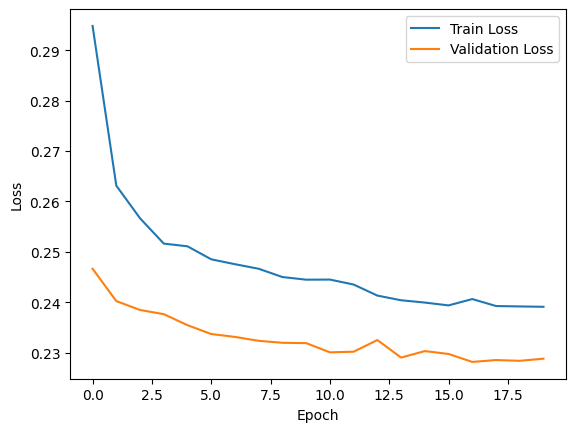

In [8]:
#TODO
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluation

Test your trained model (using the Test Dataloader that you have).

In [9]:
#TODO
def test_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    avg_test_loss = test_loss / len(test_loader)
    accuracy = correct / total
    return avg_test_loss, accuracy

test_loss, test_accuracy = test_model(model, test_loader, criterion)
print(f'Final Test Loss: {test_loss:.4f}')
print(f'Final Test Accuracy: {test_accuracy:.4f}')

Final Test Loss: 0.2310
Final Test Accuracy: 0.8955
